In [1]:
# -*- coding:utf-8 -*-  

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import operator
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

/home/lab321-day/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('data1.csv',encoding='gb2312')
a = data.copy()
data.head()

,usernumber,is_actpay,ispay_1M,ispay_2M,ispay_3M,ispay_4M,ispay_5M,ispay_6M,v_count_1m,v_count_2m,...,login_times_1m,login_times_2m,login_times_3m,login_times_4m,login_times_5m,login_times_6m,user_id,provcode,areacode,prdct_name
0,1340006****,1,3,0,0,0,0,0,1.0,NaN,...,12.0,5.0,6.0,6.0,12.0,5.0,1,19,1904,4G自选套餐流量包
1,1340044****,1,0,0,2,0,0,0,NaN,NaN,...,24.0,16.0,36.0,18.0,24.0,16.0,2,14,1401,NaN
2,1340069****,1,0,0,0,0,0,5,NaN,NaN,...,37.0,69.0,26.0,8.0,37.0,69.0,5,8,802,彩信5元套餐
3,1340082****,1,0,0,0,0,0,5,NaN,NaN,...,11.0,NaN,NaN,3.0,11.0,NaN,7,8,805,家庭亲情网3元套餐（2011版）
4,1340153****,1,0,0,2,0,0,0,1.0,NaN,...,9.0,6.0,16.0,9.0,9.0,6.0,11,19,1901,4G自选套餐流量包50元


In [4]:
a.describe()

,is_actpay,ispay_1M,ispay_2M,ispay_3M,ispay_4M,ispay_5M,ispay_6M,v_count_1m,v_count_2m,v_count_3m,...,click_6m,login_times_1m,login_times_2m,login_times_3m,login_times_4m,login_times_5m,login_times_6m,user_id,provcode,areacode
count,10987.000000,10987.000000,10987.000000,10987.000000,10987.000000,10987.000000,10987.000000,1457.000000,1656.000000,1633.000000,...,3143.00000,5870.000000,5435.000000,7897.000000,7062.000000,5870.000000,5435.000000,10987.000000,10987.000000,10987.000000
mean,0.545008,0.142623,0.102667,2.229817,0.237098,0.222991,1.997634,1.289636,1.258454,1.279241,...,539.78301,18.324872,17.628335,16.262758,16.227698,18.324872,17.628335,11159.800583,13.292254,1306.413853
std,0.497993,1.122301,1.103764,4.547349,1.524703,1.953810,0.100942,1.279534,1.140144,1.448179,...,6956.20859,22.432350,28.234034,18.956677,19.883038,22.432350,28.234034,5851.191520,9.115650,945.630867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6128.500000,5.000000,405.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,11.00000,9.000000,8.000000,9.000000,9.000000,9.000000,8.000000,11888.000000,11.000000,1101.000000
75%,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,104.00000,22.000000,20.000000,20.000000,20.000000,22.000000,20.000000,15935.000000,19.000000,1912.000000
max,1.000000,60.000000,30.000000,60.000000,30.000000,60.000000,5.000000,21.000000,18.000000,24.000000,...,228155.00000,155.000000,496.000000,155.000000,150.000000,155.000000,496.000000,20448.000000,31.000000,3104.000000


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Columns: 130 entries, usernumber to prdct_name
dtypes: float64(111), int64(11), object(8)
memory usage: 10.9+ MB


In [6]:
(a.ispay_1M==0).sum(),(a.ispay_2M==0).sum(),(a.ispay_3M	==0).sum(),(a.ispay_4M==0).sum(),(a.ispay_5M==0).sum(),(a.ispay_6M==0).sum()
#发现连续付费用户很少，而且不知道为什么6月份的数据大部分数值都是2且仅有19人未付费和前几月差距过大，而且有很多项在6m表现不正常，请问有没有合理的解释？

(10574, 10771, 6956, 10463, 10639, 19)

In [7]:
a.ispay_6M.describe()

count    10987.000000
mean         1.997634
std          0.100942
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: ispay_6M, dtype: float64

In [8]:
a.tail()

,usernumber,is_actpay,ispay_1M,ispay_2M,ispay_3M,ispay_4M,ispay_5M,ispay_6M,v_count_1m,v_count_2m,...,login_times_1m,login_times_2m,login_times_3m,login_times_4m,login_times_5m,login_times_6m,user_id,provcode,areacode,prdct_name
10982,1580887****,0,0,0,0,0,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20443,2,101,（4G飞享）
10983,1580887****,0,0,0,0,0,0,2,NaN,NaN,...,6.0,NaN,24.0,3.0,6.0,NaN,20444,2,101,移动办公20元智能套餐（150M）
10984,1580887****,0,0,0,0,0,0,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20446,2,101,新GPRS
10985,1580887****,0,0,0,0,0,0,2,NaN,NaN,...,3.0,NaN,NaN,3.0,3.0,NaN,20447,2,101,NaN
10986,1580887****,0,0,0,0,0,0,2,NaN,NaN,...,NaN,NaN,3.0,3.0,NaN,NaN,20448,2,101,（4G飞享）


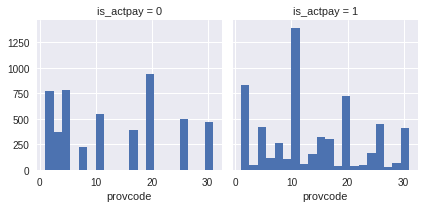

In [9]:
v = sns.FacetGrid(a, col='is_actpay')
v.map(plt.hist, 'provcode', bins=20)

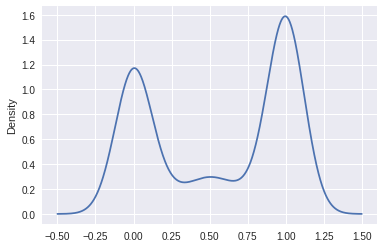

In [10]:
a=pd.DataFrame(a)
a.groupby(a.reduce_fee_1m)['is_actpay'].mean().plot(kind='density')

In [11]:
a.isnull().sum().nlargest(50)

v_count_6m                  10349
v_count_5m                  10300
send_6m                     10196
send_5m                     10189
send_4m                     10175
v_count_4m                  10148
send_2m                     10127
send_3m                     10118
read_6m                     10020
read_5m                      9974
read_4m                      9914
read_2m                      9891
read_3m                      9834
read_1m                      9766
send_1m                      9730
v_count_1m                   9530
v_count_3m                   9354
v_count_2m                   9331
click_6m                     7844
click_5m                     7725
click_4m                     7024
click_2m                     7015
click_3m                     6259
login_times_2m               5552
login_times_6m               5552
login_times_1m               5117
login_times_5m               5117
read_UserNumber              4934
send_username                4934
click_username

In [12]:
#将非数值型映射成数值型并删除ispay列（prdct_name空缺值太多不考虑）
array_rank_name = ['5星', '5星钻', '5星金', '四星', '4.0', '1.0', '未评级', '一星', '二星', '三星', 
                   np.NaN, '三星级', '五星普通', '3星级', '准星级', '全球通', '神州行', '2.0', '3.0', '0.0', 
                   '1星级', '四星级', '五星银级', '一星级', '二星级', '5.0', '五星级', '2星级', '五星金级', '6.0',
                   '五星银', '五星金', '4星级', '非星级', '3星', '4星', '等级0', '准星', '★★★★', '★★', 
                   '1星', '2星', '动感地带', '5星金卡', '五星', '★★★★★', '★★★', '5星普通', '未评定', '暂未享受星级服务',
                   '未评星级', '未评定星级', '五星金卡', '5星级', '7.0', '★', '无星级', 'AAA级', '五星钻', 'AA级',
                   '五星钻卡', '5星钻卡', 'A级', 'null']

array_link = [5,5,5,4,4,1,0,1,2,3,0,3,5,3,0,4,4,2,3,0,1,4,5,1,2,5,5,2,5,6,5,5,4,0,3,4,0,1,4,2,1,2,4,5,5,5,4,5,0,0,0,0,5,5,7,1,0,3,5,2,5,5,1,0]

# array_rank = [1,10,100,1000,10000,100000,1000000,10000000]
array_rank = [1,2,3,4,5,6,7,8]

array_delete = [ 'ispay_1M', 'ispay_2M', 'ispay_3M', 'ispay_4M', 'ispay_5M', 'ispay_6M','abc','usernumber','user_id']


star_lable=['user_level_1m','user_level_2m','user_level_3m','user_level_4m','user_level_5m','user_level_6m']
    
for name in array_delete:
    del a[name]
for name in star_lable:
    array_stab = np.array(a[name])
    
    for i in range(len(a)):
        for rank in range(len(array_rank_name)): 
            if(array_stab[i]==array_rank_name[rank]):
                array_stab[i]=array_rank[array_link[rank]]
                break
    a[name] = array_stab


In [13]:
a.describe()

,is_actpay,v_count_1m,v_count_2m,v_count_3m,v_count_4m,v_count_5m,v_count_6m,cur_amt_1m,cur_arrears_1m,arpu_1m,...,click_5m,click_6m,login_times_1m,login_times_2m,login_times_3m,login_times_4m,login_times_5m,login_times_6m,provcode,areacode
count,10987.000000,1457.000000,1656.000000,1633.000000,839.000000,687.000000,638.000000,9514.000000,9514.000000,9514.000000,...,3262.000000,3143.00000,5870.000000,5435.000000,7897.000000,7062.000000,5870.000000,5435.000000,10987.000000,10987.000000
mean,0.545008,1.289636,1.258454,1.279241,1.458880,1.468705,1.493730,186.249713,21.107708,197.904638,...,584.929185,539.78301,18.324872,17.628335,16.262758,16.227698,18.324872,17.628335,13.292254,1306.413853
std,0.497993,1.279534,1.140144,1.448179,1.768975,1.662078,1.932728,6295.412088,338.368768,5790.317982,...,14971.964906,6956.20859,22.432350,28.234034,18.956677,19.883038,22.432350,28.234034,9.115650,945.630867
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.205000,0.000000,55.820000,...,2.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,405.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.720000,0.000000,96.755000,...,10.000000,11.00000,9.000000,8.000000,9.000000,9.000000,9.000000,8.000000,11.000000,1101.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,97.560000,0.000000,157.947500,...,96.000000,104.00000,22.000000,20.000000,20.000000,20.000000,22.000000,20.000000,19.000000,1912.000000
max,1.000000,21.000000,18.000000,24.000000,21.000000,17.000000,19.000000,610873.120000,28629.750000,562158.840000,...,847759.000000,228155.00000,155.000000,496.000000,155.000000,150.000000,155.000000,496.000000,31.000000,3104.000000


In [14]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10987 entries, 0 to 10986
Columns: 121 entries, is_actpay to prdct_name
dtypes: float64(111), int64(3), object(7)
memory usage: 10.1+ MB


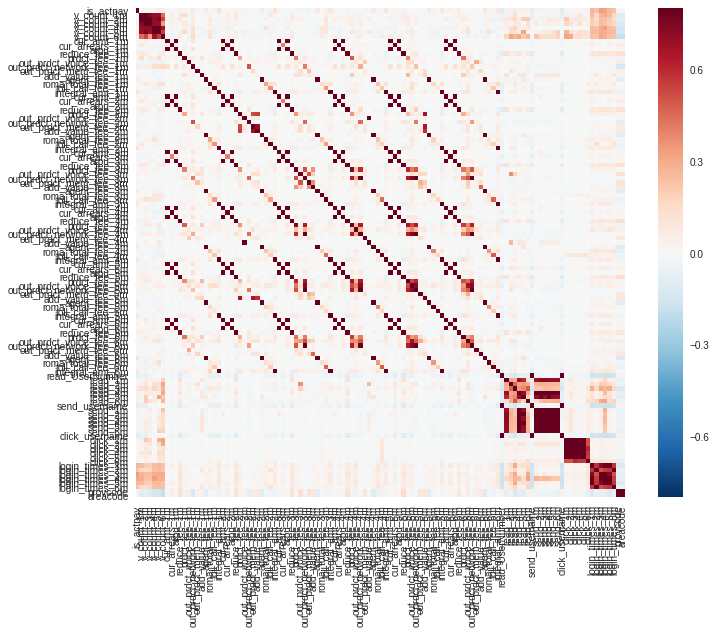

In [15]:
#correlation matrix
corrmat = a.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [16]:
y = a.is_actpay

del a['is_actpay']

from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(a, y, test_size=0.3, random_state=50)
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

modeldata = x_train

In [17]:
combine=[x_train,y_train]
modeldata.describe()

,v_count_1m,v_count_2m,v_count_3m,v_count_4m,v_count_5m,v_count_6m,cur_amt_1m,cur_arrears_1m,arpu_1m,reduce_fee_1m,...,click_5m,click_6m,login_times_1m,login_times_2m,login_times_3m,login_times_4m,login_times_5m,login_times_6m,provcode,areacode
count,1020.000000,1166.000000,1120.000000,596.000000,493.000000,448.000000,6691.000000,6691.000000,6691.000000,6691.000000,...,2274.000000,2219.000000,4092.000000,3779.000000,5506.000000,4953.000000,4092.000000,3779.000000,7690.000000,7690.000000
mean,1.283333,1.246141,1.283036,1.426174,1.440162,1.546875,116.704445,23.008842,130.741302,30.262197,...,727.290237,519.135647,18.240714,17.357237,16.164548,16.078740,18.240714,17.357237,13.278804,1305.022367
std,1.235362,1.101835,1.432196,1.649931,1.594888,2.056808,646.647944,396.997116,393.254748,78.150436,...,17920.132510,6547.507803,22.578427,27.525395,18.997992,19.932891,22.578427,27.525395,9.088546,942.943318
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.380000,0.000000,55.630000,0.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,405.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.800000,0.000000,96.690000,0.000000,...,9.000000,10.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.000000,11.000000,1101.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.330000,0.000000,158.630000,18.315000,...,96.000000,99.000000,21.000000,19.000000,20.000000,19.000000,21.000000,19.000000,19.000000,1912.000000
max,21.000000,15.000000,21.000000,19.000000,15.000000,19.000000,32905.620000,28629.750000,27168.640000,879.800000,...,847759.000000,220681.000000,155.000000,496.000000,155.000000,150.000000,155.000000,496.000000,31.000000,3104.000000


In [18]:
v=pd.concat([y_train,x_train],axis=1)#便于某些可视化分析
v.describe()

,is_actpay,v_count_1m,v_count_2m,v_count_3m,v_count_4m,v_count_5m,v_count_6m,cur_amt_1m,cur_arrears_1m,arpu_1m,...,click_5m,click_6m,login_times_1m,login_times_2m,login_times_3m,login_times_4m,login_times_5m,login_times_6m,provcode,areacode
count,7690.000000,1020.000000,1166.000000,1120.000000,596.000000,493.000000,448.000000,6691.000000,6691.000000,6691.000000,...,2274.000000,2219.000000,4092.000000,3779.000000,5506.000000,4953.000000,4092.000000,3779.000000,7690.000000,7690.000000
mean,0.545514,1.283333,1.246141,1.283036,1.426174,1.440162,1.546875,116.704445,23.008842,130.741302,...,727.290237,519.135647,18.240714,17.357237,16.164548,16.078740,18.240714,17.357237,13.278804,1305.022367
std,0.497957,1.235362,1.101835,1.432196,1.649931,1.594888,2.056808,646.647944,396.997116,393.254748,...,17920.132510,6547.507803,22.578427,27.525395,18.997992,19.932891,22.578427,27.525395,9.088546,942.943318
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.380000,0.000000,55.630000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,405.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.800000,0.000000,96.690000,...,9.000000,10.000000,9.000000,8.000000,9.000000,8.000000,9.000000,8.000000,11.000000,1101.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.330000,0.000000,158.630000,...,96.000000,99.000000,21.000000,19.000000,20.000000,19.000000,21.000000,19.000000,19.000000,1912.000000
max,1.000000,21.000000,15.000000,21.000000,19.000000,15.000000,19.000000,32905.620000,28629.750000,27168.640000,...,847759.000000,220681.000000,155.000000,496.000000,155.000000,150.000000,155.000000,496.000000,31.000000,3104.000000


In [19]:
#对空缺值处理
modeldata=modeldata.fillna(-0.1)
limit = len(modeldata)*0.15
print(limit)
a_del=[]
colun = [row for row in modeldata]
num = 0
del_name=0
for name in colun:
    
    name_array = np.array(modeldata[name])
    
    for i in range(len(modeldata)):
        if(name_array[i] == -0.1):
            num=num+1
    print(name,':',num,end='')
    if(num>= limit):
        print(',yes')
        a_del.append(str(name))
        del modeldata[name]
        del_name+=1
    else:
        print()
    num=0 
print(del_name)

1153.5
v_count_1m : 6670,yes
v_count_2m : 6524,yes
v_count_3m : 6570,yes
v_count_4m : 7094,yes
v_count_5m : 7197,yes
v_count_6m : 7242,yes
user_level_1m : 999
cur_amt_1m : 999
cur_arrears_1m : 999
arpu_1m : 999
reduce_fee_1m : 999
prdct_fee_1m : 999
out_prdct_voice_fee_1m : 999
out_prdct_network_fee_1m : 999
out_prdct_mem_fee_1m : 999
add_value_fee_1m : 999
agent_fee_1m : 1158,yes
roma_total_fee_1m : 999
toll_call_fee_1m : 999
integral_amt_1m : 999
user_level_2m : 933
cur_amt_2m : 933
cur_arrears_2m : 933
arpu_2m : 933
reduce_fee_2m : 933
prdct_fee_2m : 933
out_prdct_voice_fee_2m : 933
out_prdct_network_fee_2m : 933
out_prdct_mem_fee_2m : 933
add_value_fee_2m : 933
agent_fee_2m : 1074
roma_total_fee_2m : 933
toll_call_fee_2m : 933
integral_amt_2m : 933
user_level_3m : 861
cur_amt_3m : 861
cur_arrears_3m : 861
arpu_3m : 861
reduce_fee_3m : 861
prdct_fee_3m : 861
out_prdct_voice_fee_3m : 861
out_prdct_network_fee_3m : 861
out_prdct_mem_fee_3m : 861
add_value_fee_3m : 861
agent_fee_3m : 1

In [20]:
modeldata.describe()

,cur_amt_1m,cur_arrears_1m,arpu_1m,reduce_fee_1m,prdct_fee_1m,out_prdct_voice_fee_1m,out_prdct_network_fee_1m,out_prdct_mem_fee_1m,add_value_fee_1m,roma_total_fee_1m,...,out_prdct_voice_fee_5m,out_prdct_network_fee_5m,out_prdct_mem_fee_5m,add_value_fee_5m,agent_fee_5m,roma_total_fee_5m,toll_call_fee_5m,integral_amt_5m,provcode,areacode
count,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,...,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000
mean,101.530499,20.006796,113.743843,26.317875,87.780675,16.468031,15.242156,7.450222,9.366637,11.787544,...,13.357278,15.367905,19.095918,45.962304,4779.596850,14.822386,6.554053,3053.176346,13.278804,1305.022367
std,604.455900,370.391537,369.447778,73.608313,533.381128,127.019307,42.161340,275.249171,101.808092,31.042756,...,50.952276,229.615545,405.381222,773.542478,65020.871406,34.671085,46.584569,9395.640377,9.088546,942.943318
min,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,...,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,1.000000
25%,5.200000,0.000000,35.652500,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.380000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.380000,0.000000,5.000000,405.000000
50%,35.250000,0.000000,83.480000,0.000000,58.000000,1.520000,0.000000,0.400000,3.000000,3.000000,...,0.800000,0.000000,0.300000,3.000000,0.000000,4.180000,1.900000,850.000000,11.000000,1101.000000
75%,85.522500,0.000000,146.607500,10.000000,100.000000,14.887500,9.280000,1.700000,10.000000,11.000000,...,13.870000,3.190000,1.200000,10.000000,0.800000,14.820000,6.145000,2763.500000,19.000000,1912.000000
max,32905.620000,28629.750000,27168.640000,879.800000,37893.000000,7934.000000,743.420000,23743.000000,8590.000000,997.750000,...,3454.530000,19778.040000,17700.000000,48783.000000,901798.000000,736.890000,3893.190000,349831.000000,31.000000,3104.000000


In [21]:
#删除的列
a_del

['v_count_1m',
 'v_count_2m',
 'v_count_3m',
 'v_count_4m',
 'v_count_5m',
 'v_count_6m',
 'agent_fee_1m',
 'agent_fee_4m',
 'user_level_6m',
 'cur_amt_6m',
 'cur_arrears_6m',
 'arpu_6m',
 'reduce_fee_6m',
 'prdct_fee_6m',
 'out_prdct_voice_fee_6m',
 'out_prdct_network_fee_6m',
 'out_prdct_mem_fee_6m',
 'add_value_fee_6m',
 'agent_fee_6m',
 'roma_total_fee_6m',
 'toll_call_fee_6m',
 'integral_amt_6m',
 'read_UserNumber',
 'read_1m',
 'read_2m',
 'read_3m',
 'read_4m',
 'read_5m',
 'read_6m',
 'send_username',
 'send_1m',
 'send_2m',
 'send_3m',
 'send_4m',
 'send_5m',
 'send_6m',
 'click_username',
 'click_1m',
 'click_2m',
 'click_3m',
 'click_4m',
 'click_5m',
 'click_6m',
 'login_times_1m',
 'login_times_2m',
 'login_times_3m',
 'login_times_4m',
 'login_times_5m',
 'login_times_6m',
 'prdct_name']

In [22]:
#调整测试集
for name in a_del:
    del x_test[name]
x_test = x_test.fillna(0)

In [23]:
x_test.describe()

,cur_amt_1m,cur_arrears_1m,arpu_1m,reduce_fee_1m,prdct_fee_1m,out_prdct_voice_fee_1m,out_prdct_network_fee_1m,out_prdct_mem_fee_1m,add_value_fee_1m,roma_total_fee_1m,...,out_prdct_voice_fee_5m,out_prdct_network_fee_5m,out_prdct_mem_fee_5m,add_value_fee_5m,agent_fee_5m,roma_total_fee_5m,toll_call_fee_5m,integral_amt_5m,provcode,areacode
count,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,...,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000,3297.000000
mean,300.609745,14.214914,305.755135,26.515608,86.710412,18.134638,14.260315,8.354313,12.122872,11.098981,...,12.981611,12.060221,13.794477,39.442399,4920.393746,14.766812,6.011341,3088.647255,13.323628,1309.659387
std,10654.616926,102.779043,9820.371233,72.074169,433.887741,185.383815,37.332459,189.866278,167.000937,26.308611,...,30.845945,40.006942,220.309560,690.195312,66066.577493,42.314256,16.047838,8739.451403,9.179865,952.005553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4.840000,0.000000,33.290000,0.000000,19.290000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.380000,0.000000,5.000000,405.000000
50%,36.290000,0.000000,82.210000,0.000000,58.000000,1.330000,0.000000,0.400000,3.000000,2.800000,...,1.050000,0.000000,0.300000,3.000000,0.000000,3.600000,1.760000,850.000000,11.000000,1101.000000
75%,87.110000,0.000000,143.320000,10.000000,99.000000,14.910000,9.830000,1.600000,10.000000,11.160000,...,13.870000,3.000000,1.100000,10.000000,1.000000,13.200000,5.750000,2764.000000,19.000000,1912.000000
max,610873.120000,4128.990000,562158.840000,608.300000,22492.070000,9832.000000,514.710000,10283.000000,8800.000000,653.130000,...,485.380000,500.000000,7213.000000,35492.000000,901798.000000,1169.400000,437.000000,195643.000000,31.000000,3104.000000


In [24]:
#确认输入
x_train=modeldata
np.shape(modeldata),np.shape(y_train)

((7690, 70), (7690,))

In [25]:
#训练集缺失值填充
culon = [row for row in modeldata]
for name in culon:
    name_array = np.array(modeldata[name])
    name_array=name_array.astype(np.float64)
    mean = np.mean(name_array)
    for i in range(len(modeldata)):
        if(name_array[i]==-0.1):
            name_array[i]=mean
    modeldata[name] = name_array
modeldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7690 entries, 6991 to 5600
Data columns (total 70 columns):
user_level_1m               7690 non-null float64
cur_amt_1m                  7690 non-null float64
cur_arrears_1m              7690 non-null float64
arpu_1m                     7690 non-null float64
reduce_fee_1m               7690 non-null float64
prdct_fee_1m                7690 non-null float64
out_prdct_voice_fee_1m      7690 non-null float64
out_prdct_network_fee_1m    7690 non-null float64
out_prdct_mem_fee_1m        7690 non-null float64
add_value_fee_1m            7690 non-null float64
roma_total_fee_1m           7690 non-null float64
toll_call_fee_1m            7690 non-null float64
integral_amt_1m             7690 non-null float64
user_level_2m               7690 non-null float64
cur_amt_2m                  7690 non-null float64
cur_arrears_2m              7690 non-null float64
arpu_2m                     7690 non-null float64
reduce_fee_2m               7690 non-nul

In [26]:
modeldata.describe()

,user_level_1m,cur_amt_1m,cur_arrears_1m,arpu_1m,reduce_fee_1m,prdct_fee_1m,out_prdct_voice_fee_1m,out_prdct_network_fee_1m,out_prdct_mem_fee_1m,add_value_fee_1m,...,out_prdct_voice_fee_5m,out_prdct_network_fee_5m,out_prdct_mem_fee_5m,add_value_fee_5m,agent_fee_5m,roma_total_fee_5m,toll_call_fee_5m,integral_amt_5m,provcode,areacode
count,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,...,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000,7690.000000
mean,3.147511,114.733213,22.618849,128.533179,29.749794,99.197163,18.620367,17.235240,8.431064,10.596438,...,14.983001,17.236525,21.414905,51.526918,5426.005787,16.625104,7.357904,3422.031187,13.278804,1305.022367
std,1.510773,603.200321,370.311410,366.863754,72.909042,532.317250,126.860579,41.749533,275.233968,101.743459,...,50.711049,229.544982,405.319671,773.356738,64993.890320,34.233457,46.520170,9328.216565,9.088546,942.943318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,20.275000,0.000000,61.497500,0.000000,40.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,1.900000,0.950000,270.000000,5.000000,405.000000
50%,3.000000,55.100000,0.000000,111.555000,5.000000,79.000000,6.460000,0.020000,0.900000,5.000000,...,5.320000,0.000000,0.600000,5.000000,0.000000,7.405000,3.150000,1471.000000,11.000000,1101.000000
75%,4.000000,101.530499,6.950000,146.607500,26.317875,100.000000,16.468031,15.242156,4.300000,10.000000,...,13.870000,15.367905,2.800000,15.000000,10.000000,14.822386,6.554053,3053.176346,19.000000,1912.000000
max,7.000000,32905.620000,28629.750000,27168.640000,879.800000,37893.000000,7934.000000,743.420000,23743.000000,8590.000000,...,3454.530000,19778.040000,17700.000000,48783.000000,901798.000000,736.890000,3893.190000,349831.000000,31.000000,3104.000000


In [27]:
np.shape(x_test)

(3297, 70)

In [28]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

58.049999999999997

In [29]:
coeff_df = pd.DataFrame(x_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,arpu_1m,0.004568
45,prdct_fee_4m,0.003196
34,out_prdct_mem_fee_3m,0.002864
7,out_prdct_mem_fee_1m,0.002777
30,reduce_fee_3m,0.002431
56,arpu_5m,0.002160
28,cur_arrears_3m,0.001927
17,prdct_fee_2m,0.001769
16,reduce_fee_2m,0.001256
4,prdct_fee_1m,0.001013


In [38]:
array_trainx = x_train.values
array_trainy = y_train.values.ravel()
array_testx = x_test.values
array_testy = y_test.values.ravel()

svmclf = LinearSVC()
model_1 = svmclf.fit(array_trainx, array_trainy)
acc =svmclf.score(array_testx, array_testy)

print ('SVM:',acc)


array_trainx = x_train.values
array_trainy = y_train.values.ravel()
array_testx = x_test.values
array_testy = y_test.values.ravel()

rfclf = RandomForestClassifier()
model_2 = rfclf.fit(array_trainx, array_trainy)
acc =rfclf.score(array_testx, array_testy)

print ('RandomForest:',acc)

SVM: 0.575068243858
RandomForest: 0.791325447376


In [46]:
importances = rfclf.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)

In [49]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 69 (0.077537)
2. feature 68 (0.052532)
3. feature 30 (0.031241)
4. feature 12 (0.026361)
5. feature 1 (0.026289)
6. feature 16 (0.023211)
7. feature 11 (0.022300)
8. feature 2 (0.021212)
9. feature 39 (0.021084)
10. feature 55 (0.020612)
11. feature 40 (0.020360)
12. feature 32 (0.018494)
13. feature 53 (0.018371)
14. feature 67 (0.017150)
15. feature 42 (0.016715)
16. feature 26 (0.016118)
17. feature 44 (0.016069)
18. feature 25 (0.014904)
19. feature 21 (0.014322)
20. feature 18 (0.014259)
21. feature 28 (0.014215)
22. feature 46 (0.014191)
23. feature 27 (0.014027)
24. feature 3 (0.013594)
25. feature 59 (0.013457)
26. feature 35 (0.013097)
27. feature 51 (0.012738)
28. feature 14 (0.012573)
29. feature 60 (0.012349)
30. feature 0 (0.012317)
31. feature 66 (0.012249)
32. feature 57 (0.012220)
33. feature 62 (0.012168)
34. feature 24 (0.011971)
35. feature 10 (0.011845)
36. feature 65 (0.011603)
37. feature 52 (0.011584)
38. feature 58 (0.011444)
39. feat

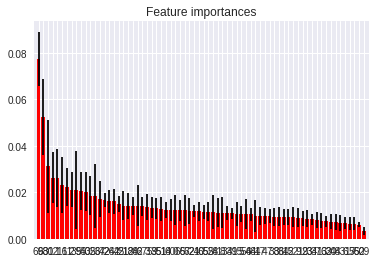

In [47]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(array_trainx.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(array_trainx.shape[1]), indices)
plt.xlim([-1, array_trainx.shape[1]])
plt.show()

In [31]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(array_trainx, array_trainy)
acc_decision_tree = round(decision_tree.score(array_testx, array_testy) * 100, 2)
acc_decision_tree

79.159999999999997

,Algorithm,CrossValMeans,CrossValerrors
0,LR,0.597270,0.009117
1,SVC,0.552276,0.003580
2,KNN,0.790388,0.013787
3,decision_tree,0.783363,0.015305
4,random_forest,0.835499,0.011649
5,GBDT,0.857086,0.011914
6,xgbGBDT,0.908709,0.008259


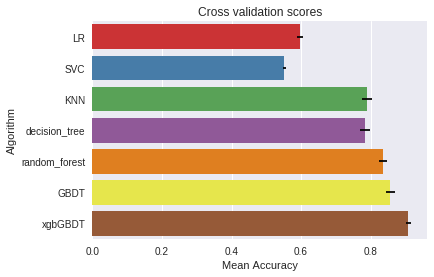

In [59]:
array_trainx = x_train.values
array_trainy = y_train.values


lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=500,min_samples_leaf=5)
gbdt = GradientBoostingClassifier(n_estimators=500,learning_rate=0.03,max_depth=3)
xgbGBDT = XGBClassifier(learning_rate =0.01, n_estimators=5000, max_depth=4, min_child_weight=6,
                         gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005, 
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1)
clfs = [lr, svc, knn, dt, rf, gbdt, xgbGBDT]

kfold = 10
cv_results = []
for classifier in clfs :
    cv_results.append(cross_val_score(classifier, x_train.values, y_train.values, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["LR","SVC",'KNN','decision_tree',"random_forest","GBDT","xgbGBDT"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set1",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
cv_res=pd.DataFrame(cv_res)
cv_res

In [60]:
class Ensemble(object):
    
    def __init__(self,estimators):
        self.estimator_names = []
        self.estimators = []
        for i in estimators:
            self.estimator_names.append(i[0])
            self.estimators.append(i[1])
        self.clf = LogisticRegression()
    
    def fit(self, train_x, train_y):
        for i in self.estimators:
            i.fit(train_x,train_y)
        x = np.array([i.predict(train_x) for i in self.estimators]).T
        y = train_y
        self.clf.fit(x, y)
    
    def predict(self,x):
        x = np.array([i.predict(x) for i in self.estimators]).T
        #print(x)
        return self.clf.predict(x)
        
    
    def score(self,x,y):
        s = precision_score(y,self.predict(x))
        return s

In [61]:
bag = Ensemble([('xgbGBDT',xgbGBDT),('rf',rf),('gbdt',gbdt)])
score = 0
for i in range(0,10):
    num_test = 0.20
    X_train, X_cv, Y_train, Y_cv = train_test_split(x_train.values, y_train.values, test_size=num_test)
    bag.fit(X_train, Y_train)
    Y_test = bag.predict(x_test.values)
    acc_xgb = round(bag.score(X_cv, Y_cv) * 100, 2)
    score+=acc_xgb
print(score/10)  

92.334


In [ ]:
array_trainx = x_train.values
array_trainy = y_train.values

xgbGBDT0 = XGBClassifier(learning_rate =0.01, n_estimators=5000, max_depth=4, min_child_weight=6,
                         gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005, 
                         objective= 'binary:logistic', nthread=4, scale_pos_weight=1)

num_test = 0.20
array_trainx, X_cv, array_trainy, Y_cv = train_test_split(array_trainx, array_trainy, test_size=num_test)
eval_set=[(X_cv,Y_cv)]
xgbGBDT0.fit(array_trainx,array_trainy,eval_metric="logloss",verbose=True,eval_set=eval_set)


In [28]:
#NN
from __future__ import print_function
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import regularizers

#from keras.utils.visualize_util import plot


Using TensorFlow backend.


In [65]:
model = Sequential()
model.add(Dense(70, input_shape=(70,), init='normal', activation='relu')))
model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(40))
model.add(Activation('relu'))
# model.add(Dropout(0.4))
model.add(Dense(70))
model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
opt=Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [68]:
history = model.fit(x_train.values, y_train.values,validation_split=0.2,
                    batch_size=7690, nb_epoch=1200,
                    verbose=1,shuffle=True)
#, validation_data=(x_test.values, y_test.values)

Train on 6152 samples, validate on 1538 samples
Epoch 1/1200
6152/6152 [==============================] - 0s - loss: 0.9425 - acc: 0.8945 - val_loss: 1.9369 - val_acc: 0.7386
Epoch 2/1200
6152/6152 [==============================] - 0s - loss: 0.9375 - acc: 0.9007 - val_loss: 1.9206 - val_acc: 0.7367
Epoch 3/1200
6152/6152 [==============================] - 0s - loss: 0.9169 - acc: 0.9056 - val_loss: 1.9588 - val_acc: 0.7295
Epoch 4/1200
6152/6152 [==============================] - 0s - loss: 0.9402 - acc: 0.8945 - val_loss: 1.9385 - val_acc: 0.7380
Epoch 5/1200
6152/6152 [==============================] - 0s - loss: 0.9377 - acc: 0.9002 - val_loss: 1.9213 - val_acc: 0.7360
Epoch 6/1200
6152/6152 [==============================] - 0s - loss: 0.9160 - acc: 0.9052 - val_loss: 1.9591 - val_acc: 0.7263
Epoch 7/1200
6152/6152 [==============================] - 0s - loss: 0.9403 - acc: 0.8943 - val_loss: 1.9504 - val_acc: 0.7347
Epoch 8/1200
6152/6152 [==============================] - 0s - 

In [89]:
Y_test=model.predict(x_test.values)

In [85]:
score = model.evaluate(x_test.values, y_test.values, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.24788023744
Test accuracy: 0.695177434031


In [90]:
Y_test=np.where(Y_test>0.5,1,0)


In [91]:
Y_test

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [1],
       [1]])

In [76]:
array_testy=y_test.values

In [92]:
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)

In [93]:
print("\tPrecision: %1.3f" % precision_score(array_testy, Y_test))
print("\tRecall: %1.3f" % recall_score(array_testy, Y_test))
print("\tF1: %1.3f\n" % f1_score(array_testy, Y_test))

	Precision: 0.694
	Recall: 0.788
	F1: 0.738



In [77]:
from sklearn.externals import joblib
joblib.dump(bag,'2nd_2.model')

['2nd_2.model']

In [32]:
xgbGBDT.plot_tree()

NameError: name 'xgbGBDT' is not defined

In [ ]:
model.save('2nd.h5')
